In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 4CEF-E2B2

 Directory of C:\Users\HP\Documents\Assignment questions\Multilinear regression

10-05-2023  07:06    <DIR>          .
25-04-2023  21:22    <DIR>          ..
10-05-2023  06:56    <DIR>          .ipynb_checkpoints
02-05-2023  05:12             2,436 50_Startups.csv
09-04-2023  14:31               468 proble_statement(50_startups).txt
09-04-2023  14:30             1,752 Toyota Corolla.txt
09-04-2023  14:31           224,041 ToyotaCorolla.csv
10-05-2023  07:06               768 Untitled.ipynb
               5 File(s)        229,465 bytes
               3 Dir(s)  420,570,165,248 bytes free


In [3]:
data=pd.read_csv("50_Startups.csv")

In [5]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [10]:
data_cols=['RandD_Spend','Administration','Marketing_Spend', 'State', 'Profit']
data.columns= data_cols
data.columns

Index(['RandD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [11]:
data_columns

['RandD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


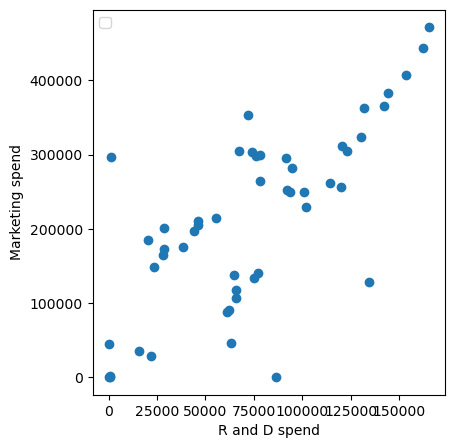

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(data.RandD_Spend,data.Marketing_Spend)
plt.xlabel("R and D spend")
plt.ylabel("Marketing spend")
plt.legend(loc="best")
plt.show()

In [13]:
data.isna().sum()

RandD_Spend        0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

<AxesSubplot:>

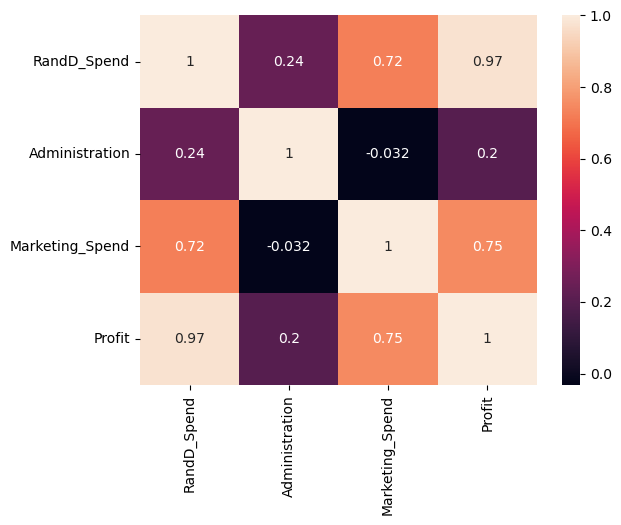

In [14]:
sns.heatmap(data.corr(),annot=True)

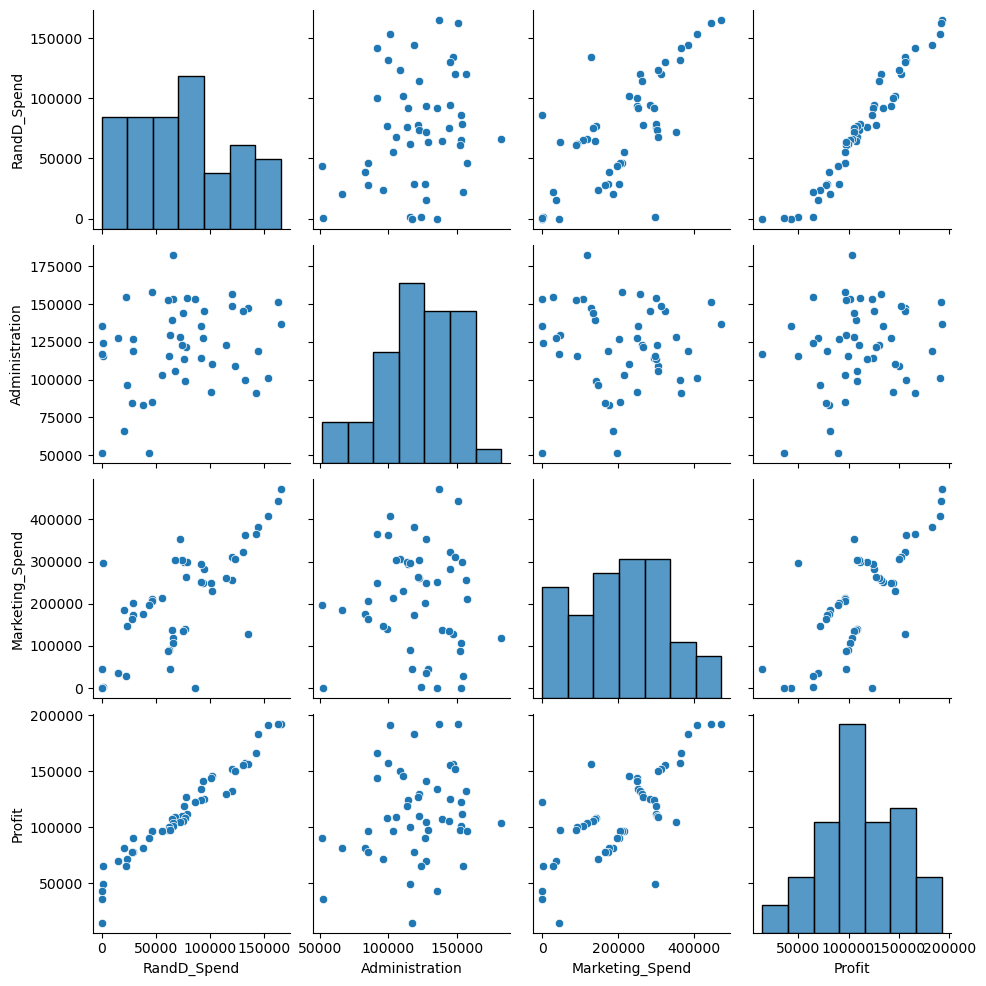

In [16]:
sns.pairplot(data)

In [17]:
#stats model

In [20]:
import statsmodels.formula.api as smf
model=smf.ols("Profit~RandD_Spend+Administration+Marketing_Spend",data=data).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 10 May 2023   Prob (F-statistic):           4.53e-30
Time:                        07:27:52   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RandD_Spend         0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#claculating VIF(variance inflation factor) values 
rqs_rd=smf.ols("RandD_Spend~Administration+Marketing_Spend",data=data).fit().rsquared
vif_rd = 1/(1-rqs_rd)

In [24]:
vif_rd 

2.4689030699947017

In [25]:
rqs_ad = smf.ols("Administration~RandD_Spend+Marketing_Spend",data=data).fit().rsquared
vif_ad = 1/(1-rqs_ad)

In [26]:
vif_ad

1.1750910070550458

In [27]:
rqs_ms = smf.ols("Marketing_Spend~Administration+RandD_Spend",data=data).fit().rsquared
vif_ms = 1/(1-rqs_ms)

In [28]:
vif_ms

2.3267732905308773

In [33]:
v1={"variable":['RandD_SPend','Administration','Marketing Spend'], 
    'VIf':[vif_rd,vif_ad,vif_ms]}
vif_frame=pd.DataFrame(v1)
vif_frame


,variable,VIf
0,RandD_SPend,2.468903
1,Administration,1.175091
2,Marketing Spend,2.326773


In [34]:
#test for residual to be normal


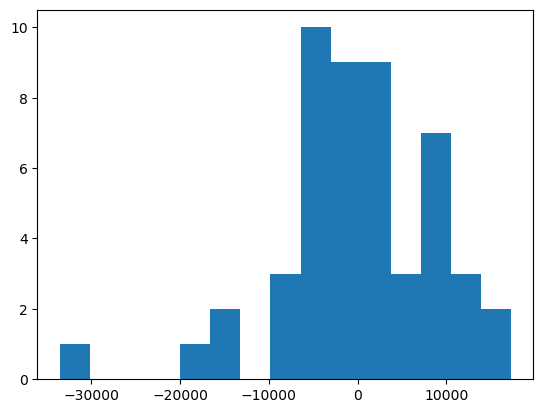

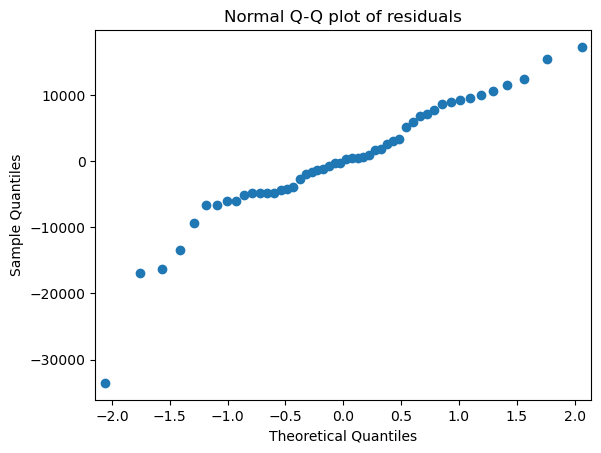

In [35]:
plt.hist(model.resid,bins=15)
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid)
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [36]:
# residual plot of homoscedasticity

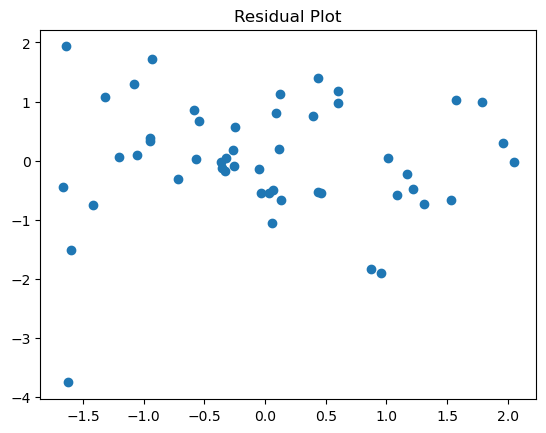

In [38]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.show()

In [39]:
#residual against regressor

eval_env: 1


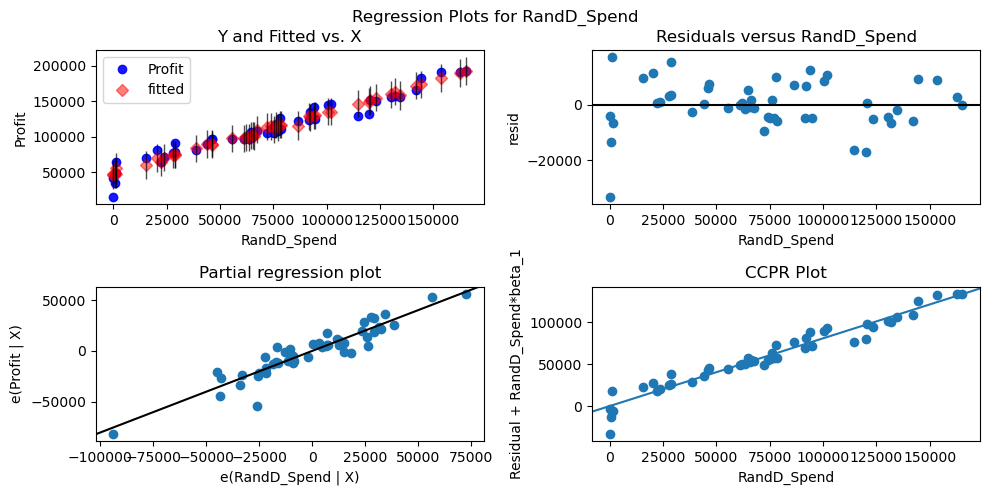

In [41]:
fig=plt.figure(figsize=(10,5))
sm.graphics.plot_regress_exog(model,"RandD_Spend",fig=fig)
plt.show()

eval_env: 1


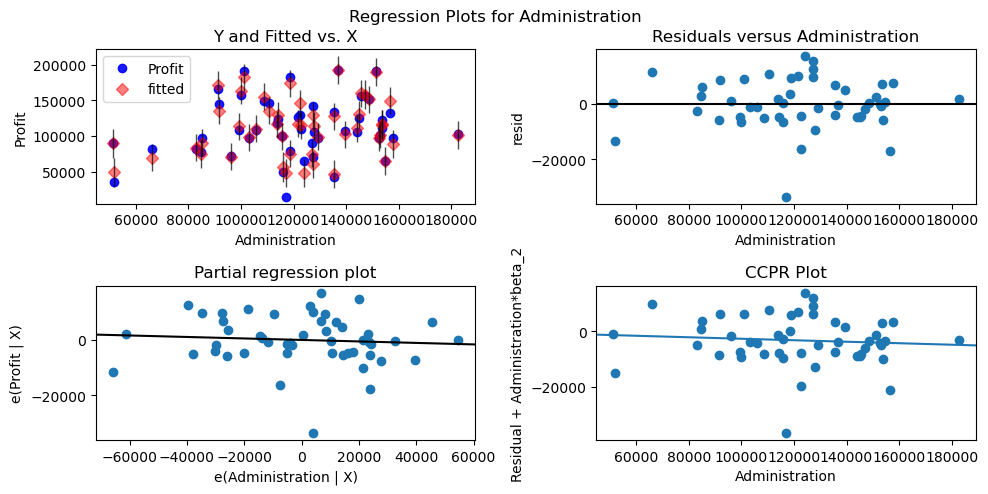

In [43]:
fig=plt.figure(figsize=(10,5))
sm.graphics.plot_regress_exog(model,"Administration",fig=fig)
plt.show()

eval_env: 1


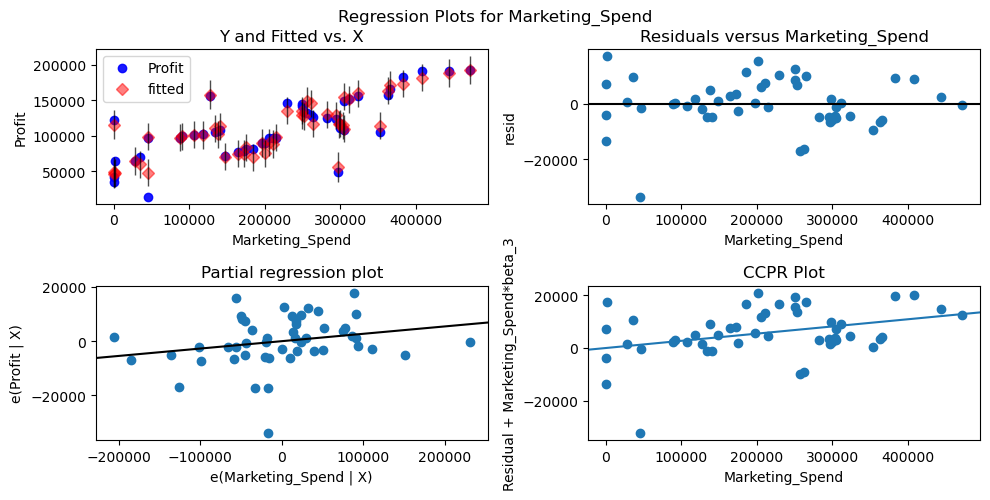

In [44]:
fig=plt.figure(figsize=(10,5))
sm.graphics.plot_regress_exog(model,"Marketing_Spend",fig=fig)
plt.show()

In [45]:
# cooks distance

In [46]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance
k=3
n=50
3*(k+1)/n


0.24

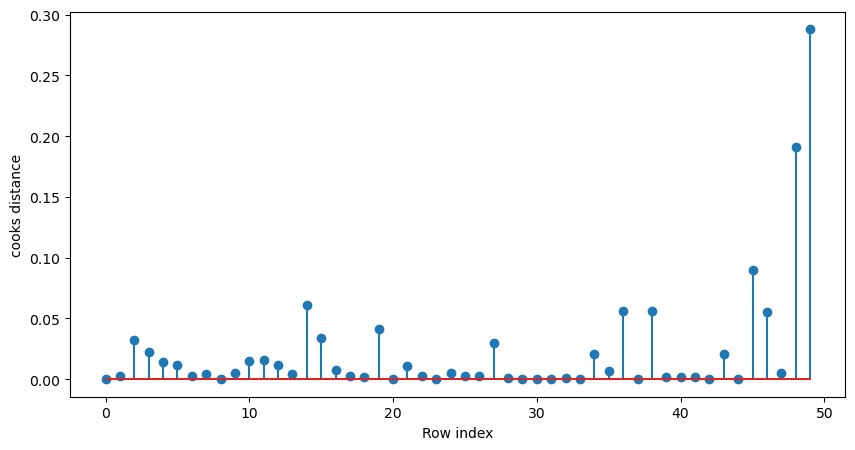

In [47]:
fig=plt.figure(figsize=(10,5))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel("Row index")
plt.ylabel("cooks distance")
plt.show()

In [48]:
np.where(c>0.24)

(array([49], dtype=int64),)

In [49]:
data_new=pd.read_csv("50_Startups.csv")

In [50]:
data_new.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [51]:
chng_cols=['RandD_Spend','Administration','Marketing_Spend', 'State', 'Profit']
data_new.columns=chng_cols
data_new.columns

Index(['RandD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [52]:
data1 = data_new.drop(data_new.index[49],axis=0).reset_index()

In [53]:
data1 = data1.drop(['index'],axis=1)
data1.head()

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [54]:
# model building

In [55]:
final_model = smf.ols("Profit~RandD_Spend+Administration+Marketing_Spend",data=data1).fit()

In [56]:
final_model.rsquared,final_model.aic

(0.9613162435129847, 1020.5652974526367)

In [57]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Wed, 10 May 2023   Prob (F-statistic):           8.85e-32
Time:                        08:17:02   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RandD_Spend         0.7830      0.038     20.470      0.000       0.706       0.860
Administration     -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing_Spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
final_model.predict(data1[["RandD_Spend","Administration","Marketing_Spend"]])

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64